<a href="https://colab.research.google.com/github/JunkyByte/easy_ViTPose/blob/main/colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# easy_ViTPose demo
Be sure to enable GPU runtime

In [1]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt
!pip install huggingface_hub
!pip install onnx onnxruntime-gpu

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 461 (delta 261), reused 444 (delta 248), pack-reused 0
Receiving objects: 100% (461/461), 2.47 MiB | 24.09 MiB/s, done.
Resolving deltas: 100% (261/261), done.
Branch 'cleanup_and_colab' set up to track remote branch 'cleanup_and_colab' from 'origin'.
Switched to a new branch 'cleanup_and_colab'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44

# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [34]:
#@title Choose model and run this cell
#@markdown Only ONNX and torch models here

MODEL_TYPE = 'onnx'  #@param ["onnx", "torch"]
MODEL_SIZE = 'b'  #@param ['s', 'b', 'l', 'h']
YOLO_TYPE = 'onnx'  #@param ['onnx', 'torch']
YOLO_SIZE = 's'  #@param ['s', 'n']
ext = {'tensorrt': '.engine', 'onnx': '.onnx', 'torch': '.pth'}[MODEL_TYPE]
ext_yolo = {'onnx': '.onnx', 'torch': '.pt'}[YOLO_TYPE]

In [35]:
import os
import sys
from huggingface_hub import hf_hub_download
sys.path.append('easy_ViTPose/src')
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, 'vitpose-25-' + MODEL_SIZE) + ext
FILENAME_YOLO = 'yolov5/yolov5' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

# Run inference

In [36]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from inference import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-15 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /root/.cache/huggingface/hub/models--JunkyByte--easy_ViTPose/snapshots/2e599f9067ef175c7e270bafca586d1cf8d3f9df/yolov5/yolov5s.onnx for ONNX Runtime inference...
Adding AutoShape... 


requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


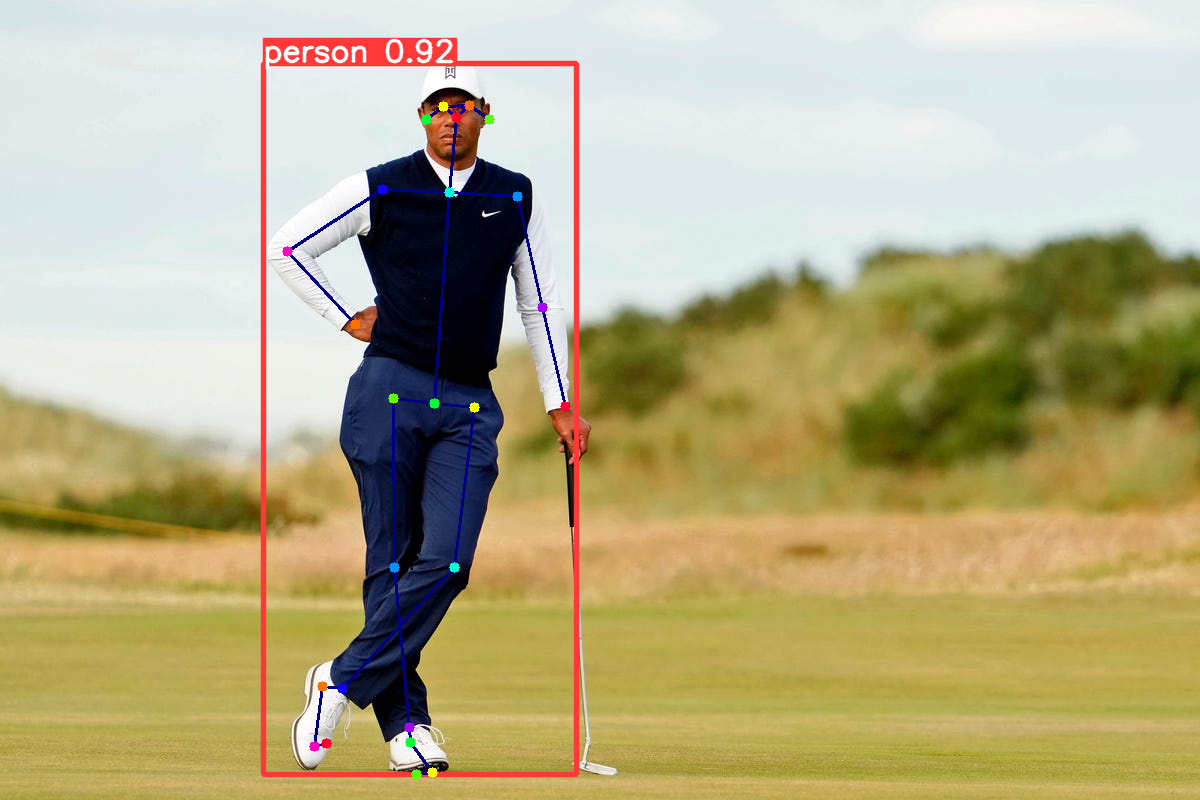

In [37]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

# Load image and run inference
url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open(BytesIO(urlopen(url).read())), dtype=np.uint8)

frame_keypoints, yolo_res = model.inference(img)
img = np.array(yolo_res.render())[0]

img = np.array(img)[:, :, ::-1]  # RGB to BGR for cv2 modules
for k in frame_keypoints:
    img = draw_points_and_skeleton(img.copy(), k,
                                    joints_dict()['coco']['skeleton'],
                                    person_index=0,
                                    points_color_palette='gist_rainbow',
                                    skeleton_color_palette='jet',
                                    points_palette_samples=10,
                                    confidence_threshold=0.4)

from google.colab.patches import cv2_imshow
cv2_imshow(img)

Saving img1.jpg to img1 (8).jpg


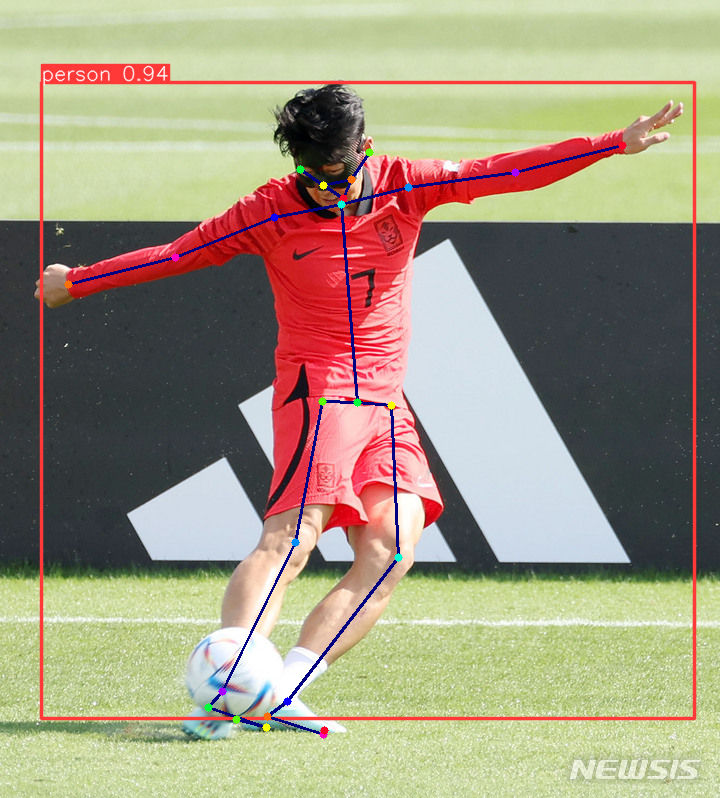

In [38]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints, yolo_res = model.inference(img)
img = np.array(yolo_res.render())[0]

img = np.array(img)[:, :, ::-1]  # RGB to BGR for cv2 modules
for k in frame_keypoints:
    img = draw_points_and_skeleton(img.copy(), k,
                                    joints_dict()['coco']['skeleton'],
                                    person_index=0,
                                    points_color_palette='gist_rainbow',
                                    skeleton_color_palette='jet',
                                    points_palette_samples=10,
                                    confidence_threshold=0.4)

from google.colab.patches import cv2_imshow
cv2_imshow(img)